# Project Assigment 3

In [1]:
# Prepare the packages !

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns


from IPython.display import Image
from six import StringIO
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

## Data Preparation

In [2]:
# Import the data sets
data=pd.read_csv('dataset/bank-additional-full.csv', sep=';',header=0)

# Lets see the data shape
print("Dataset shape :", data.shape)

Dataset shape : (41188, 21)


In [3]:
# Lets see the data info
data.info()

# Lets see the data head & tail
display(data.head())
display(data.tail())

# Lets describe the data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# Missing Value Detected
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Exploration Data Analysis

Text(0.5, 1.0, 'Target Variable:Has the client subscribed a term deposit? ')

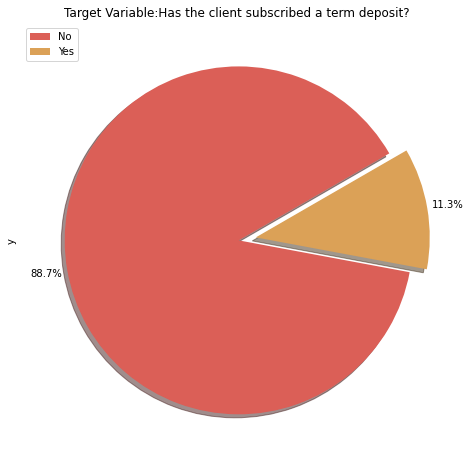

In [5]:
# Lets see the target variable

#Pie plot of the target variable
colors_list = sns.color_palette("hls",12)

data.y.value_counts().plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%',# to label the wedges with their percentage 
                            startangle=30,    
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list, # add custom colors
                            explode = [0, 0.1]
                           
                            )
plt.legend(labels=("No","Yes"), loc='upper left')
plt.title("Target Variable:Has the client subscribed a term deposit? ")

In [6]:
# Data Default
default_data= data.groupby(["default","y"]).size()
default_data

default  y  
no       no     28391
         yes     4197
unknown  no      8154
         yes      443
yes      no         3
dtype: int64

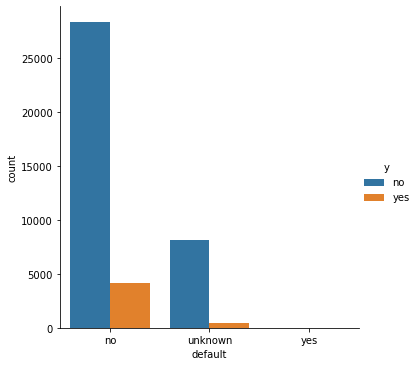

In [7]:
# Lets visualize the data
sns.catplot(x='default',hue='y',kind='count',data=data)

<AxesSubplot:>

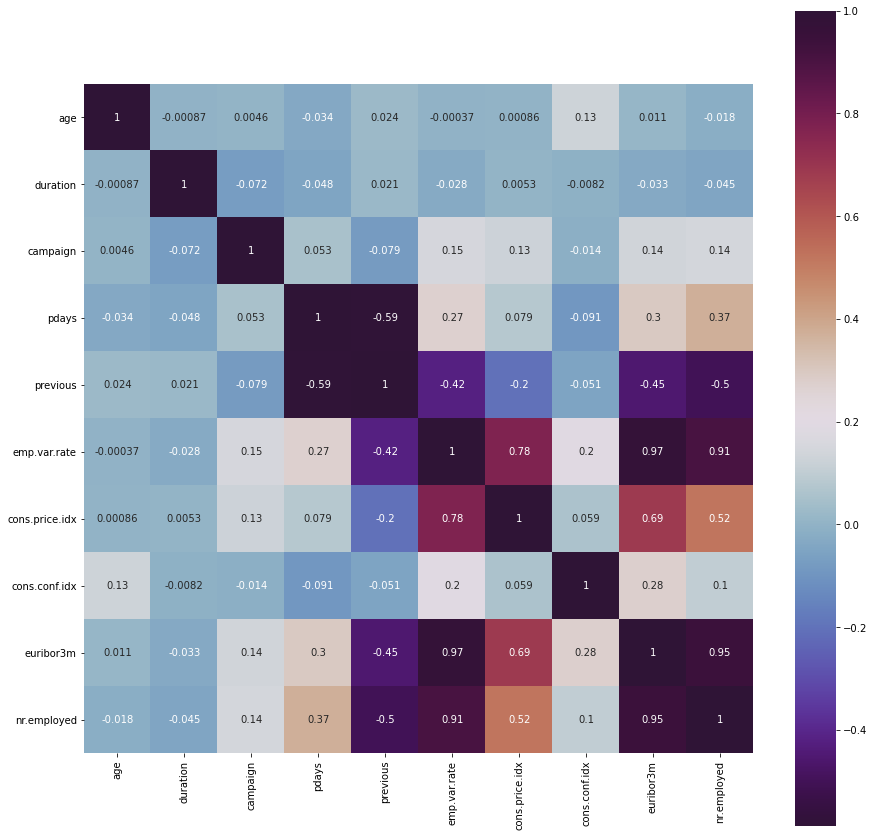

In [8]:
# Lets check the correlation all variables

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),square=True,annot=True,cmap= 'twilight_shifted')

## Data Modeling

### Standardize Data

In [9]:
# Check the unique of variables

data.apply(lambda x : len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [10]:
# Lets the split feature variable & target variable

X=data.drop(['y'],axis=1)
y=data['y']

In [11]:
# Get the dummy datasets

X = pd.get_dummies(X)

In [12]:
# Create the All Classification Model of Machine Learning

classifiers = [
    LogisticRegression(solver="liblinear"),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel='rbf', gamma=.01, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    MLPClassifier(alpha=1),
    GaussianNB(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
              ]


In [13]:
# Create the Method 

def train_model(X, y, model, test_size=.3):
    X_train, X_dev, y_train, y_dev = train_test_split(
        X, y, test_size=test_size, random_state=99
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_dev.shape[0]}..")

    start = time()
    model.fit(X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(X_train)
    dev_prediction = model.predict(X_dev)
    Score = metrics.accuracy_score(y_dev, dev_prediction)
    
    print("Confusion Matrix")
    print(confusion_matrix(y_dev, dev_prediction))
    
    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Development performance:")
    print(classification_report(y_dev, dev_prediction))
    
    print('Accuracy Score: %.5f' % Score)

In [14]:
# Run the model

for model in classifiers:
    print(f"=== Using {model.__class__.__name__} ===")
    train_model(X, y, model)

=== Using LogisticRegression ===
Training with 28831 data.. Validating with 12357..
Done training LogisticRegression in 0.623s
Confusion Matrix
[[10662   273]
 [  847   575]]
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     25613
         yes       0.66      0.41      0.50      3218

    accuracy                           0.91     28831
   macro avg       0.79      0.69      0.73     28831
weighted avg       0.90      0.91      0.90     28831

Development performance:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     10935
         yes       0.68      0.40      0.51      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

Accuracy Score: 0.90936
=== Using KNeighborsClassifier ===
Training with 28831 data.. Validating with 12357..
Done training 

In [15]:
Table_Summary = pd.DataFrame({'Machine Learning Algorithm':['Logistic Regression','KNN','SVM - Linear',
                                                            'SVM - RBF','Decision Tree',
                                                            'Random Forest', 'Neural Network',
                                                            'Naive Bayes','Ada Boosting', 
                                                            'Gradient Boosting'],
                              'Score':[0.90936, 0.89706, 0.89463, 0.90006, 0.91373,
                                       0.91171, 0.90710, 0.85878, 0.90815, 0.91535],
                          })
Table_Summary.sort_values(by=['Score'], ascending=False)

,Machine Learning Algorithm,Score
9,Gradient Boosting,0.91535
4,Decision Tree,0.91373
5,Random Forest,0.91171
0,Logistic Regression,0.90936
8,Ada Boosting,0.90815
6,Neural Network,0.90710
3,SVM - RBF,0.90006
1,KNN,0.89706
2,SVM - Linear,0.89463
7,Naive Bayes,0.85878


## Analysis

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

So now we have to decide which one is the best model, and we have two types of wrong values:
1. False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
2. False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.


### Why is Support Vector Machine Model extremely slow?

The situation could also be much more complex because of all that nice stuff scikit-learn is doing for us behind the bars. The above is valid for the classic 2-class SVM. If you are by any chance trying to learn some multi-class data; scikit-learn will automatically use OneVsRest or OneVsAll approaches to do this (as the core SVM-algorithm does not support this). Read up scikit-learns docs to understand this part.

The same warning applies to generating probabilities: SVM's do not naturally produce probabilities for final-predictions. So to use these (activated by parameter) scikit-learn uses a heavy cross-validation procedure called Platt scaling which will take a lot of time too!

### Ensamble Models

This is a type of ensemble technique, where a number of weak learners are combined together to form a strong learner. Here, usually, each weak learner is developed as decision stumps (A stump is a tree with just a single split and two terminal nodes) that are used to classify the observations.

This is a type of ensemble technique, where a number of weak learners are combined together to form a strong learner. Here, usually, each weak learner is developed as decision stumps (A stump is a tree with just a single split and two terminal nodes) that are used to classify the observations.

Just like AdaBoost, Gradient Boost also combines a no. of weak learners to form a strong learner. Here, the residual of the current classifier becomes the input for the next consecutive classifier on which the trees are built, and hence it is an additive model. The residuals are captured in a step-by-step manner by the classifiers, in order to capture the maximum variance within the data, this is done by introducing the learning rate to the classifiers.

#### So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.

The Best Models is Decision Tree (with the lowest False Positive in machine learning models), But the highest accuracy models is Gradient Boosting.